# Lecture 19: Least squares fitting

... time to starting thinking about ~~Christmas~~ ~~data~~ coursework! :(

*Extended coursework deadline:* Thursday 15th December, 2pm

*Module feedback*: https://leeds.bluera.com/leeds, deadline Friday 6th January 2023

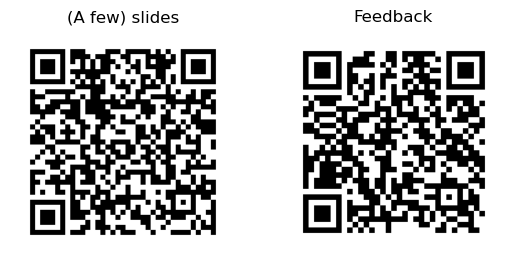

In [1]:
import qrcode

qrcodeimg = qrcode.make(
    "https://comp2421-numerical-computation.gitlab.io/lec/lec19_.html"
)
feedbackimg = qrcode.make("https://go.blueja.io/a6P3NppwDEOIc24AyhNe-w")

from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].imshow(qrcodeimg, cmap="gray")
ax[0].set_title("(A few) slides")
ax[0].axis("off")
ax[1].imshow(feedbackimg, cmap="gray")
ax[1].set_title("Feedback")
ax[1].axis("off")
plt.show()

## Motivation

-   Suppose we are given data point representing a quantity over time.

-   We want to represent the graph of this data as a simple curve.

-   The examples on the following slide show the fitting of two different curves through some experimental data:

    -   a straight line;
    -   a quadratic curve.

### Weekly earnings

In [2]:
from datetime import datetime as dt
import pandas as pd
import requests

data_url = "http://www.ons.gov.uk/file?uri=/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/averageweeklyearningsearn01/current/earn01nov2022.xls"
r = requests.get(data_url)
df = pd.read_excel(r.content, sheet_name="1. AWE Total Pay")
df = df.iloc[:, [0, 1]]
df.columns = ["date", "earnings"]
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna()
# since 2008
df = df[df["date"] > "2008-01-01"]


def to_days(date):
    return float((date - dt(2008, 1, 1)).days)


days = df.apply(lambda row: to_days(row.date), axis=1)

Raw data for average UK weekly earnings since 2008 (from ONS)

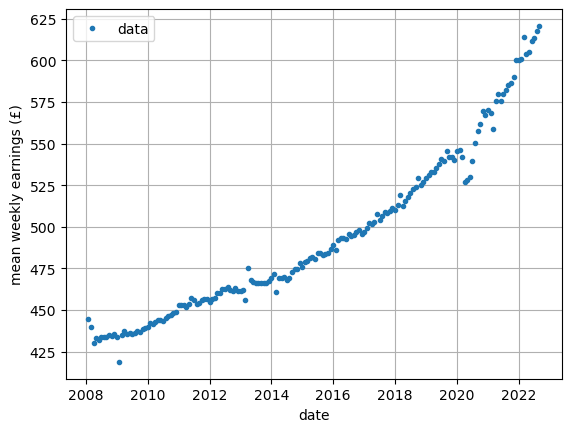

In [3]:
from matplotlib import pyplot as plt

plt.plot(df["date"], df["earnings"], ".", label="data")
plt.xlabel("date")
plt.ylabel("mean weekly earnings (£)")
plt.grid()
plt.legend()
plt.show()

Raw data for weekly earning with a straight line of best fit:

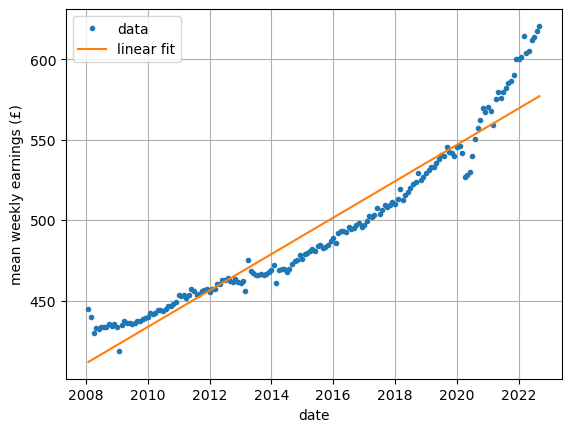

In [4]:
import numpy as np


def fit_line(x, y):
    A = np.array([[d, 1] for d in x])
    b = np.array([[e] for e in y])

    AtA = A.T @ A
    Atb = A.T @ b

    coef = np.linalg.solve(AtA, Atb)
    return lambda t: coef[0] * t + coef[1]


fit1 = fit_line(days, df["earnings"])

plt.plot(df["date"], df["earnings"], ".", label="data")
plt.plot(df["date"], fit1(days), label="linear fit")
plt.xlabel("date")
plt.ylabel("mean weekly earnings (£)")
plt.grid()
plt.legend()
plt.show()

Raw data for weekly earnings with a quadric curve of best fit:

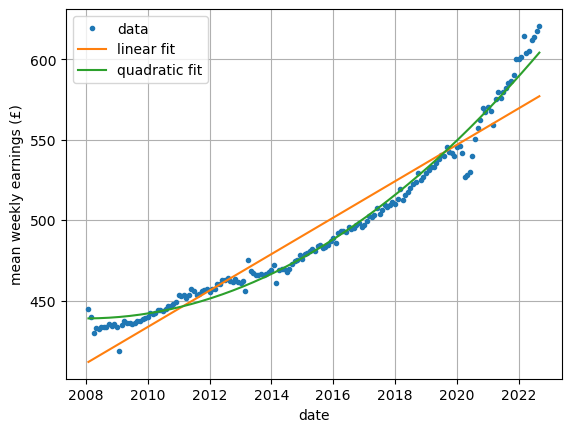

In [5]:
def fit_quad(x, y):
    A = np.array([[d * d, d, 1] for d in x])
    b = np.array([[e] for e in y])

    AtA = A.T @ A
    Atb = A.T @ b

    coef = np.linalg.solve(AtA, Atb)
    return lambda t: coef[0] * t * t + coef[1] * t + coef[2]


fit2 = fit_quad(days, df["earnings"])

plt.plot(df["date"], df["earnings"], ".", label="data")
plt.plot(df["date"], fit1(days), label="linear fit")
plt.plot(df["date"], fit2(days), label="quadratic fit")
plt.xlabel("date")
plt.ylabel("mean weekly earnings (£)")
plt.grid()
plt.legend()
plt.show()

.... how do we do this....